# Capstone Project - Naive Bayes

This first cell contains a code snippet demonstrating Gaussian Naive Bayes using synthetic data.

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# create synthetic data
X, y = make_classification(n_samples = 100, 
                           n_features = 5, 
                           n_classes = 2, 
                           weights = [0.6, 0.4], 
                           random_state = 27)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 27)

# fit model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# predict
y_pred = gnb.predict(X_test)
print(y_pred)

# evaluate model
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)


[0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0]
0.9666666666666667


This code cell uses the heart disease dataset from Assignment 2 to train a Gaussian NB model and a Logistic Regression model. The accuracy score, f1 score, AUROC, AUPRC are calculated and plotted, and a quick comparison of how many y predictions the models had in common is also included.

[0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0]
Accuracy score: 0.6936936936936937
F1 score: 0.6730769230769231


C:\Users\viole\AppData\Local\Temp\ipykernel_23032\4135312513.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target.replace(["True", "False"], # make event variable numeric


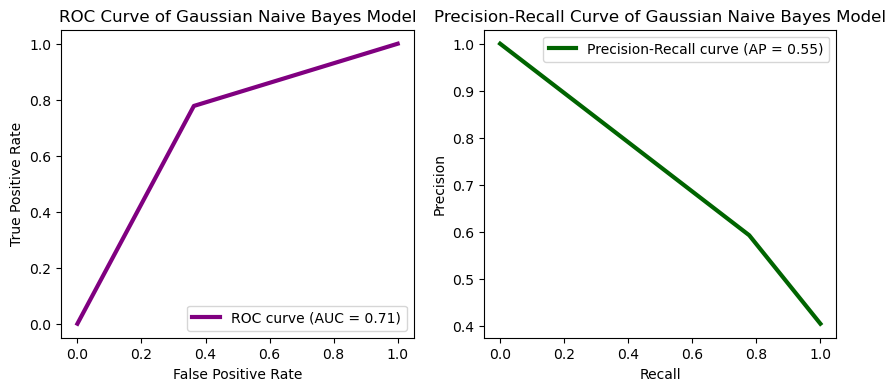

[False  True False  True  True False False  True  True False False  True
  True  True False  True False  True  True False  True  True  True  True
 False False False False False False  True  True False False False  True
 False  True False False False  True False False False  True False  True
  True  True  True False  True  True  True  True  True False False  True
  True False False  True  True  True  True False  True False  True False
  True  True  True  True False  True False False False False  True  True
 False  True False  True False False  True False  True False  True False
 False  True  True  True False False False False False  True False  True
 False  True  True]
Accuracy score: 0.7477477477477478
F1 score: 0.7254901960784313


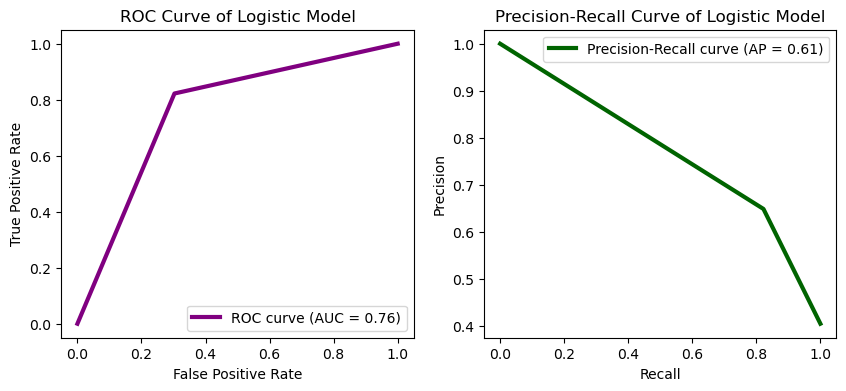

The two models had the same classification prediction for 101 out of 111 data points (90.99%)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score, f1_score

# import dataset
heart_disease = pd.read_csv("heart_disease_uci.csv")

# clean data
clean_df = heart_disease.copy()

missing_data = clean_df.isnull().sum() / len(clean_df) # calculate ratio of missing values per column
drop_cols = missing_data[missing_data > 0.3].index # create an index of columns that exceed threshold
clean_df.drop(drop_cols, 
              axis = 1, 
              inplace = True
              ) # drop the columns that exceed threshold

clean_df.dropna(inplace = True) # drop any remaining NAs (mostly categorical/discrete values that wouldn't benefit from imputation)
clean_df.drop_duplicates() # drop duplicate rows

# split into target and features
target = clean_df.copy()[clean_df.columns[9]] # set 'exang' column as target
features = clean_df.copy().drop("exang", axis = 1) # set all other columns as features
target.replace(["True", "False"], # make event variable numeric
               [1, 0], 
               inplace = True)

for col in features.columns:
    if features[col].dtype == 'object':
        features = pd.concat([features, 
                              pd.get_dummies(features[col], 
                                             prefix = col)], 
                             axis = 1
                             ) # one-hot encode categorical variables
        features.drop(col, 
                      axis = 1, 
                      inplace = True
                      )

# split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size = 0.15, 
                                                    random_state = 27
                                                    )

# fit model
gnb = GaussianNB()
gnb.fit(x_train, y_train)

gnb_y_pred = gnb.predict(x_test)
print(y_pred)

# evaluate the model
# AUROC
gnb_fpr, gnb_tpr, th = roc_curve(y_test, gnb_y_pred)
gnb_auroc = auc(gnb_fpr, gnb_tpr)
# AUPRC
gnb_precision, gnb_recall, th2 = precision_recall_curve(y_test, gnb_y_pred)
gnb_average_precision = average_precision_score(y_test, gnb_y_pred)
# accuracy and f1 scores
gnb_acc = accuracy_score(y_test, gnb_y_pred)
gnb_f1 = f1_score(y_test, gnb_y_pred)

print(f'Accuracy score: {gnb_acc}')
print(f'F1 score: {gnb_f1}')

# plot AUROC and AUPRC
gnb_fig, gnb_axes = plt.subplots(1, 2, figsize = (10, 4))
# AUROC
gnb_axes[0].plot(gnb_fpr, 
                 gnb_tpr, 
                 color = 'purple', 
                 lw = 3, 
                 label = 'ROC curve (AUC = %0.2f)' % gnb_auroc
                 )
gnb_axes[0].set_xlabel('False Positive Rate')
gnb_axes[0].set_ylabel('True Positive Rate')
gnb_axes[0].set_title('ROC Curve of Gaussian Naive Bayes Model')
gnb_axes[0].legend(loc = 'lower right')
# AUPRC
gnb_axes[1].plot(gnb_recall, 
                 gnb_precision, 
                 color = 'darkgreen', 
                 lw = 3, 
                 label = 'Precision-Recall curve (AP = %0.2f)' % gnb_average_precision
                 )
gnb_axes[1].set_xlabel('Recall')
gnb_axes[1].set_ylabel('Precision')
gnb_axes[1].set_title('Precision-Recall Curve of Gaussian Naive Bayes Model')
gnb_axes[1].legend(loc = 'upper right')

plt.show()

##### logistic regression for binary classification #####
log_reg = LogisticRegression(penalty = 'l1', 
                             solver = 'liblinear'
                             )
log_reg.fit(x_train, y_train)

# predict on test data
log_y_pred = log_reg.predict(x_test)
print(log_y_pred)

# evaluate the model
# AUROC
log_fpr, log_tpr, th = roc_curve(y_test, log_y_pred)
log_auroc = auc(log_fpr, log_tpr)
# AUPRC
log_precision, log_recall, th2 = precision_recall_curve(y_test, log_y_pred)
log_average_precision = average_precision_score(y_test, log_y_pred)
# accuracy and f1 scores
log_acc = accuracy_score(y_test, log_y_pred)
log_f1 = f1_score(y_test, log_y_pred)

print(f'Accuracy score: {log_acc}')
print(f'F1 score: {log_f1}')

# plot AUROC and AUPRC
log_fig, log_axes = plt.subplots(1, 2, figsize = (10, 4))
# AUROC
log_axes[0].plot(log_fpr, 
                 log_tpr, 
                 color = 'purple', 
                 lw = 3, 
                 label = 'ROC curve (AUC = %0.2f)' % log_auroc
                 )
log_axes[0].set_xlabel('False Positive Rate')
log_axes[0].set_ylabel('True Positive Rate')
log_axes[0].set_title('ROC Curve of Logistic Model')
log_axes[0].legend(loc = 'lower right')
# AUPRC
log_axes[1].plot(log_recall, 
                 log_precision, 
                 color = 'darkgreen', 
                 lw = 3, 
                 label = 'Precision-Recall curve (AP = %0.2f)' % log_average_precision
                 )
log_axes[1].set_xlabel('Recall')
log_axes[1].set_ylabel('Precision')
log_axes[1].set_title('Precision-Recall Curve of Logistic Model')
log_axes[1].legend(loc = 'upper right')

plt.show()

#####
compare_y_pred = gnb_y_pred == log_y_pred

trues = 0
falses = 0
for item in compare_y_pred:
    if item == True:
        trues += 1
    else:
        falses += 1

print(f'The two models had the same classification prediction for {trues} out of {len(compare_y_pred)} data points ({round((trues / len(compare_y_pred) * 100), 2)}%).')